In [5]:
%load_ext autoreload
%autoreload 2
%pylab inline
from RiboGraphViz import RiboGraphViz as RGV

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [6]:
# make a RiboGraphViz object
test_struct =  '...((((..(((....(((...)))..)))..(((...)))....))))...'
rgv = RGV(test_struct)

In [7]:
# get topology statistics.
rgv.get_info()

Max ladder distance: 10
n_hairpins: 3
n_internal_loops: 1
n_3WJs: 1
n_4WJs: 0
n_5WJs_up: 0


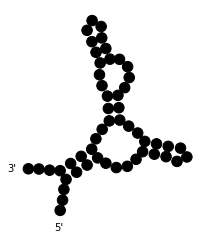

In [104]:
# make plot.
rgv.draw()

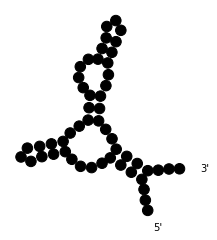

In [105]:
# A hack to correct 5' 3' location:

ax = rgv.draw()
ax.invert_xaxis()

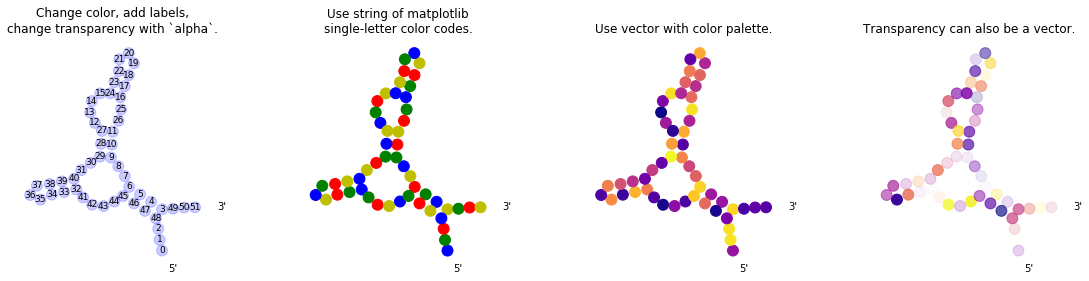

In [106]:
# Color using as matplotlib color syntax:

figure(figsize=(16,4))
subplot(1,4,1)
title('Change color, add labels,\nchange transparency with `alpha`.')
ax = rgv.draw(c='b', label=[x for x in range(52)], alpha=0.2, fontsize=9)

ax.invert_xaxis()

subplot(1,4,2)

title('Use string of matplotlib\nsingle-letter color codes.')
ax = rgv.draw(c='bgry'*13)
ax.invert_xaxis()

subplot(1,4,3)
title('Use vector with color palette.')
ax = rgv.draw(c=np.random.uniform(size=52), cmap='plasma')
ax.invert_xaxis()

subplot(1,4,4)
title('Transparency can also be a vector.')
ax = rgv.draw(c=np.random.uniform(size=52), cmap='plasma', alpha = np.random.uniform(size=52))
ax.invert_xaxis()

tight_layout()
savefig('RGV_example_colorings.png', dpi=150)

## Color large RNA by p(unpaired) in conjunction with arnie.

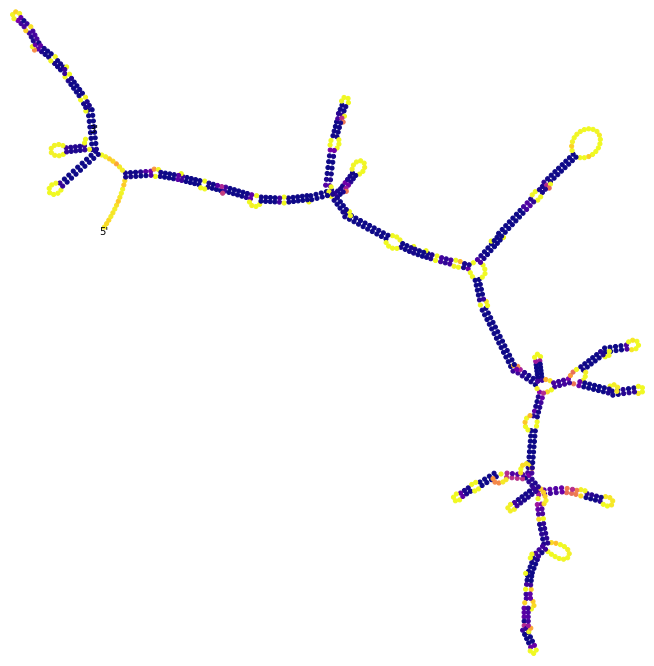

In [36]:
from arnie.bpps import bpps
from arnie.mfe import mfe

eGFP_mRNA = 'ATGGTATCGAAGGGTGAGGAGCTCTTTACAGGCGTCGTGCCTATCTTGGTGGAAC\
TGGACGGCGACGTGAACGGCCACAAGTTTAGCGTGTCCGGAGAGGGCGAAGGGGATGCCACGTACGGGA\
AGCTGACCTTGAAGTTCATCTGTACCACGGGCAAGCTGCCCGTGCCGTGGCCGACCCTGGTGACCACGC\
TCACCTATGGGGTCCAATGCTTCAGTCGGTACCCCGACCACATGAAGCAGCACGATTTCTTCAAGTCCG\
CCATGCCCGAAGGTTACGTCCAAGAAAGGACAATATTTTTCAAAGACGATGGCAACTATAAAACCCGAG\
CCGAGGTCAAGTTCGAGGGTGACACCCTGGTGAACCGCATCGAGCTCAAGGGCATCGACTTCAAAGAGG\
ATGGTAATATCCTGGGCCACAAGCTGGAGTATAACTACAACAGCCACAATGTGTACATCATGGCGGACA\
AGCAGAAGAACGGTATCAAGGTGAACTTTAAGATTCGGCACAATATCGAGGACGGCAGCGTGCAGCTCG\
CCGATCACTACCAACAGAACACGCCGATCGGCGATGGCCCCGTGCTGCTGCCCGATAACCATTATTTGA\
GCACCCAGAGCGCCCTCTCCAAGGACCCTAACGAGAAGAGGGACCATATGGTGCTCCTCGAGTTCGTTA\
CCGCCGCCGGTATCACCCTGGGCATGGACGAACTGTATAAGAGATCTCGCGACATAAGCCACGGCTTCC\
CGCCAGCCGTGGCCGCACAGGACGACGGGACGCTGCCCATGAGCTGCGCTCAGGAGTCCGGCATGGACA\
GACATCCCGCCGCCTGTGCGAGCGCAAGGATCAATGTGTAA'

struct = mfe(eGFP_mRNA, package='vienna')

# vector of p(unpaired)
bpp_vec = 1 - np.sum(bpps(eGFP_mRNA, package='vienna'),axis=0)

rg = RGV(struct)

figure(figsize=(12,12))
rg.draw(c=bpp_vec, cmap='plasma')
savefig('punp_coloration_eGFP.pdf')

## Make a quick in-notebook movie

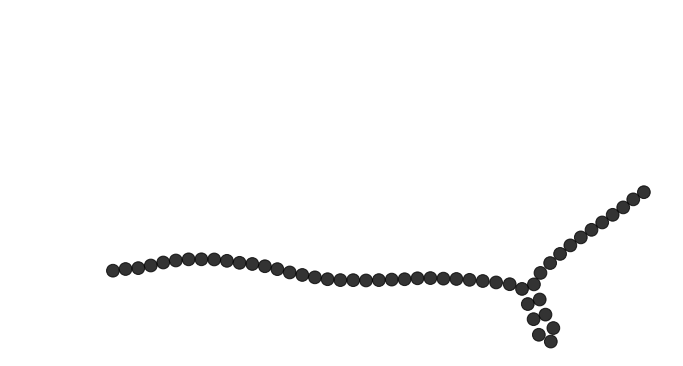

In [100]:
from IPython import display

structs=[
    '...((((..(((....(((...)))..)))..(((...)))....))))...',    
    '....(((..(((....(((...)))..)))..(((...)))....)))....',    
    '.....((..(((....(((...)))..)))..(((...)))....)).....',    
    '......(..(((....(((...)))..)))..(((...)))....)......',    
    '.........(((....(((...)))..)))..(((...)))...........',
    '..........((....(((...)))..))...(((...)))...........',
    '...........(....(((...)))..)....(((...)))...........',
    '................(((...))).......(((...)))...........',
    '.................((...))........(((...)))...........',
    '..................(...).........(((...)))...........',
    '................................(((...)))...........',

]

rgv_objs = [RGV(s) for s in structs]
figure(figsize=(12,12))
for i in range(len(rgv_objs)):
    plt.clf()
    rgv_objs[i].draw(align=True, c='k', alpha=0.8)
    xlim([-600,3200])
    ylim([-500,1500])
    display.display(plt.gcf())
    display.clear_output(wait=True)

(-500, 1500)

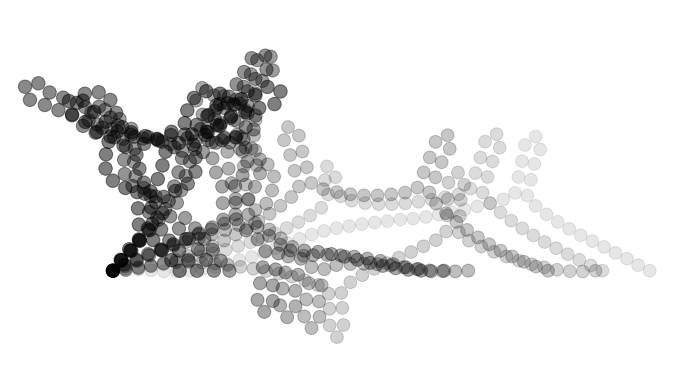

In [101]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

for i in range(len(rgv_objs)):
    rgv_objs[i].draw(align=True, align_mode='end', c='k', alpha=0.5-(0.04*i), ax = ax)
ax.set_xlim([-600,3200])
ax.set_ylim([-500,1500])

## Make a gif

Generate MFE structures and base pair probabilities for increasing temperature using Arnie and Vienna 2.

In [492]:
eGFP_structs = [mfe(eGFP_mRNA, T=X) for X in range(35,105,5)]
eGFP_base_pair_probabilities = [1 - np.sum(bpps(eGFP_mRNA, T=X),axis=0) for X in range(35,105,5)]

rgv_objs = [RGV(s) for s in eGFP_structs]

Play with x, y axes to get idea for how to set constant x, y limits.

(-9000, 7500)

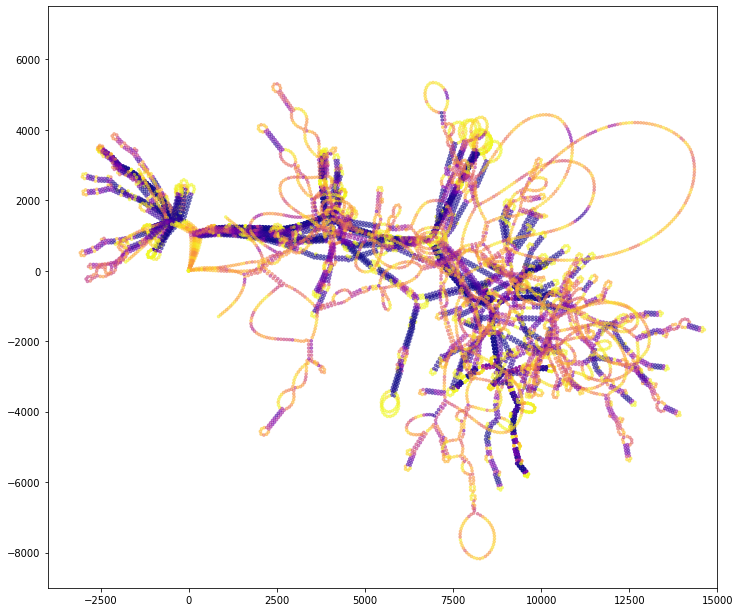

In [493]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

for i in range(len(eGFP_structs)):
    rgv_objs[i].draw(align=True, align_mode='COM', c=eGFP_base_pair_probabilities[i],
                     cmap='plasma', alpha=0.5, ax = ax)

ax.axis('on')
ax.set_xlim([-4000,15000])
ax.set_ylim([-9000,7500])

Finally: generate png images and concatenate together into a gif using `convert` command line tool from Imagemagick.

In [496]:
for i in range(len(rgv_objs)):
    figure(figsize=(12,12))
    rgv_objs[i].draw(align=True, align_mode='COM', c=eGFP_base_pair_probabilities[i], cmap='plasma', alpha=0.8)
    xlim([-4000,15000])
    ylim([-9000,7500])
    savefig('tmp_eGFP_%02d.png' % i, dpi=72)
    close()
    
! convert -delay 25 tmp*.png melting_eGFP_mRNA.gif
! rm tmp*.png

## Draw more than one structure in same force-directed graph

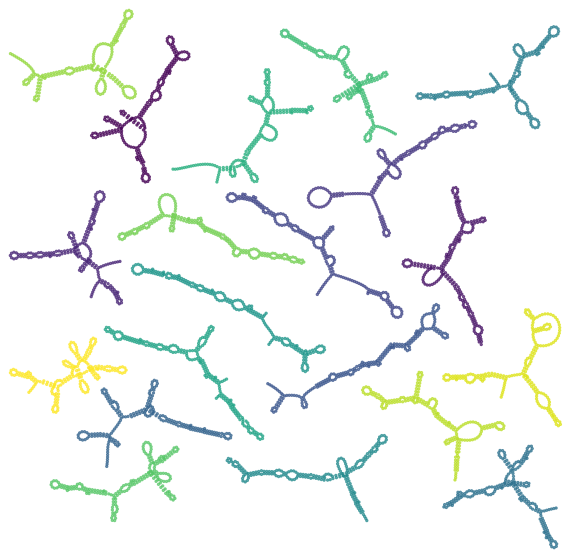

In [99]:
# Generate 20 random RNAs

structures = []
for i in range(20):
    rand_rna = ''.join(np.random.choice(['A','C','G','U'], size=200))
    new_struct = mfe(rand_rna)
    structures.append(new_struct)
    
multi_rg = RGV(' '.join(structures))

figure(figsize=(10,10))
multi_rg.draw(alpha=0.7, c = np.concatenate([[x]*200 for x in range(20)]), cmap='viridis')

savefig('multiple_struct_example.png',dpi=150,bbox_inches='tight')